In [3]:
import pandas as pd
import sklearn.model_selection
import sklearn.ensemble

#gf
#import mlflow
#import mlflow.keras
#import mlflow.tensorflow
#from hyperopt import fmin, tpe, hp, SparkTrials, Trials, STATUS_OK
#from hyperopt.pyll import scope

from tensorflow.keras.layers import Dense, LSTM
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

#import streamlit as st
import joblib

import tensorflow as tf
#Librerias para redes neuronales(secuencial)
from tensorflow.keras.models import Sequential
#Capa completamente conectada
from tensorflow.keras.layers import Dense, Normalization
#Optimizador
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Configurar pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#### 1. Leer datos para crear los Modelos IA

In [5]:

import pyarrow.parquet as pq

In [8]:
#Leer datos en Spark DataBrinks
#df_delta = spark.read.format("delta").load("/mnt/datalakemlopsd4m/presentation/proyectopases_presentation/datos_presentation_tabladelta_bi")
#datos = df_delta.toPandas()
#datos.head()

import pyarrow.parquet as pq

# Ruta a la tabla Delta
delta_table_path = "datos_presentation_tabladelta_bi/"

# Leer la tabla Delta
table = pq.read_table(delta_table_path)

# Convertir la tabla a un DataFrame de Pandas
datos = table.to_pandas()

# Mostrar las primeras filas del DataFrame de Pandas
datos.head()


,id_ciclo_acarreo,id_cargadescarga_ciclo,id_palas,id_equipo_camion,id_ciclo_carguio,id_equipo_carguio,id_trabajador_pala,id_guardia_realiza_carga_al_camion,id_locacion_hace_carga,id_poligono_se_obtiene_material,tiempo_inicio_carga_carguio,tiempo_esperando_carguio,tiempo_ready_cargando_pala,tiempo_ready_esperando_pala,previous_esperando_pala,al_termino_cargar_en_espera_cuadrado_cuadrandose,cambio_estado_operatividad_carguio,cantidad_equipos_espera_al_termino_carga_pala,id_estados_camion,id_equipo_table_estados_camion,id_detal_estado_camion,tiempo_inicio_cambio_estado_camion,tiempo_estimado_duracion_estado_camion,en_campo_o_taller_mantenimiento_camion,id_tipo_estad_camion,estado_detalle_camion,estado_secundario_camion,estado_primario_camion,id_estados_pala,id_equipo_table_estados_pala,id_detal_estado_pala,tiempo_inicio_cambio_estado_pala,tiempo_estimado_duracion_estado_pala,en_campo_o_taller_mantenimiento_pala,id_tipo_estad_pala,estado_detalle_pala,estado_secundario_pala,estado_primario_pala,id_zona_hace_descarga,id_factor,id_poligono,tiempo_llegada_camion,tiempo_esperando_camion_en_locacion,tiempo_cuadra_camion,tiempo_cuadrado_camion,tiempo_cargar_al_camion,tiempo_acarreo_camion,tiempo_cola_camion_en_zonadescarga,tiempo_retroceso_para_descargar,tiempo_listo_para_descargar,tiempo_descarga_camion,tiempo_viajando_vacio_locacion,tiempo_ready_llegada_esperando,tiempo_ready_esperando_cuadra,tiempo_ready_cuadra_cuadrado,tiempo_ready_cuadrado_cargado,tiempo_ready_carga_acarreo,tiempo_ready_acarreo_cola,tiempo_ready_cola_retro,tiempo_ready_retro_listo,tiempo_ready_listo_descarga,tiempo_ready_descarga_viajandovacio,id_trabajador_camion,id_palanext,tonelaje_nominal,tonelaje_segun_computadora,cambios_estado_en_ciclo,id_guardia_hizocarga,id_guardia_hizodescarga,id_zona_aplicafactor,id_zona_pertenece_poligono,factor,toneladas_secas,productividad_operativa_acarreo_tn_h,productividad_operativa_carguio_tn_h,efhcargado_mts,efhvacio_mts,distancia_recorrida_camioncargado_km_gps_mts,distancia_recorrida_camionvacio_km_gps_mts,coordenada_x_descarga_km,coordenada_y_descarga_km,coordenada_z_descarga_km,tipo_descarga_efectuado,tonelaje_camion_viajevacio_cicloanterior_vims,tonelaje_camion_viajevacio_cicloactual_vims,promedio_velocidad_camioncargado_km/hr_compu,promedio_velocidad_camionvacio_km/hr_compu,promedio_velocidad_camioncargado_km/hr_gps,promedio_velocidad_camionvacio_km/hr_gps,tonelaje_camion_antes_cargaestabilizada,porcentaje_combustible_camioncargando,porcentaje_combustible_camiondescargando,volumen_nominal,aplica_factor_volumen_o_tonelaje,nivel_descarga_metros,efh_factor_loaded,efh_factor_empty,nombre_equipo_acarreo,id_flota_secundaria,nombre_flota_secundaria,id_flota_principal,nombre_flota_principal,capacidad_en_volumen_equipo_acarreo_m3,capacidad_en_peso_equipo_acarreo,capacidadtanque_equipoacarreo_galones,peso_bruto_equipo_acarreo,si_no_equipo_altaprecision,ancho_equipo_metros,largo_equipo_metros,numeroejes_equipo,nombre_equipo_carguio,capacidad_en_volumen_equipo_carguio_m3,capacidad_en_peso_equipo_carguio,capacidadtanque_equipocarguio_galones,radiohexagonocuchara_equipocarguio,id_turnos_turnocarga,nombre_turnocarga,horaini_turnocarga,horafin_turnocarga,id_turnos_turnodescarga,nombre_turnodescarga,horaini_turnodescarga,horafin_turnodescarga,id_zona_encuentra_descarga,id_nodo_carga,id_nodo_descarga,nivel_elevacion_descarga_metros,nombre_zona_descarga,nombre_locacion_carga,nivel_elevacion_locacion_carga_metros,radio_locacion_metros,ids_poligonos_en_locacion_carga,id_material_dominante_en_poligono,nombre_poligono,elevacion_poligono_metros,lista_leyes,densidad_inicial_poligono_creado_tn/m3,tonelaje_inicial_poligono_creado,id_pases,id_palas_pases,coord_x_pases,coord_y_pases,coord_z_pases,angulo_giro_pases,tonelaje_pases,duracion_excavacion_pases,angulo_giro_promedio_pases,has_block_pases,porcentaje_eficiencia_toneladas_movidas_acarreo,altura_elevacion,factor_perfil_rutavacio,factor_perfil_rutacargado,numero_pases_carguio,Galones_disponibles_cami

In [10]:
datos.shape

(330118, 163)

##### 2.2 Metodo 2 -  Usar un bucle para realizar el codigo de One Hot Encoding

VARIABLE nombre_equipo_carguio

In [11]:
import pandas as pd

# Obtener las categorías únicas
categorias = datos['nombre_equipo_carguio'].unique()

# Crear un DataFrame vacío con columnas para cada categoría, Diccionario one_hot_dict : categoria: clave es una categoría única de #nombre_equipo_carguio, y el [0]*len(datos) : valor asociado a cada clave es una lista de ceros de la misma longitud que el DataFrame 
one_hot_dict = {categoria: [0]*len(datos) for categoria in categorias}

# Llenar el diccionario con 1s en las posiciones correspondientes
# idx es el índice de la fila, val es el valor de nombre_equipo_carguio en esa fila
# Si idx=0 y val='CF02', entonces one_hot_dict['CF02'][0] = 1
for idx, val in datos['nombre_equipo_carguio'].items():
    one_hot_dict[val][idx] = 1

# Convertir el diccionario a un DataFrame
one_hot_df = pd.DataFrame(one_hot_dict)

#Unir el DataFrame original con el codificado
datos = pd.concat([datos, one_hot_df], axis=1)

# # Mostrar el resultado
datos[['nombre_equipo_carguio','CF02','CF01', 'CF03', 'PH03', 'PH02', 'PH01', 'FR01']].head()

,nombre_equipo_carguio,CF02,CF01,CF03,PH03,PH02,PH01,FR01
0,CF02,1,0,0,0,0,0,0
1,CF02,1,0,0,0,0,0,0
2,CF02,1,0,0,0,0,0,0
3,CF02,1,0,0,0,0,0,0
4,CF03,0,0,1,0,0,0,0


VARIABLE Procedencia

In [12]:
# Obtener las categorías únicas
categorias_pro = datos['Procedencia'].unique()

# Crear un DataFrame vacío con columnas para cada categoría, Diccionario one_hot_dict : categoria: clave es una categoría única de #nombre_equipo_carguio, y el [0]*len(datos) : valor asociado a cada clave es una lista de ceros de la misma longitud que el DataFrame 
one_hot_dict_pro = {categoria: [0]*len(datos) for categoria in categorias_pro}

# Llenar el diccionario con 1s en las posiciones correspondientes
# idx es el índice de la fila, val es el valor de nombre_equipo_carguio en esa fila
# Si idx=0 y val='CF02', entonces one_hot_dict['CF02'][0] = 1
for idx, val in datos['Procedencia'].items():
    one_hot_dict_pro[val][idx] = 1

# Convertir el diccionario a un DataFrame
one_hot_dict_pro_df = pd.DataFrame(one_hot_dict_pro)

#Unir el DataFrame original con el codificado
datos = pd.concat([datos, one_hot_dict_pro_df], axis=1)

# # Mostrar el resultado
datos[['Procedencia','TAJ', 'SUL', 'OXI', 'NoDefinido']].head()

,Procedencia,TAJ,SUL,OXI,NoDefinido
0,SUL,0,1,0,0
1,SUL,0,1,0,0
2,SUL,0,1,0,0
3,SUL,0,1,0,0
4,OXI,0,0,1,0


#### 3. Hacemos un tratamiento de variable Boleana para convertir a Numerica por el Metodo del Mapping

Variable al_termino_cargar_en_espera_cuadrado_cuadrandose

In [14]:
# # Crear un diccionario para mapear valores booleanos a numéricos
bool_to_num = {True: 1, False: 0}

# # Aplicar el diccionario a la columna booleana para convertirla a numérica
datos['al_termino_cargar_en_espera_cuadrado_cuadrandose'] = datos['al_termino_cargar_en_espera_cuadrado_cuadrandose'].map(bool_to_num)

# Mostrar el resultado
datos['al_termino_cargar_en_espera_cuadrado_cuadrandose'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: al_termino_cargar_en_espera_cuadrado_cuadrandose, dtype: float64

#### Variables Seleccionadas antes de entrenar los modelos de ML

In [15]:
datos_subset=datos[['tonelaje_inicial_poligono_creado',
#'radiohexagonocuchara_equipocarguio',
'capacidad_en_volumen_equipo_carguio_m3',
#'capacidad_en_volumen_equipo_acarreo_m3', #varianza 0
'capacidad_en_peso_equipo_carguio',
#'capacidad_en_peso_equipo_acarreo',  # varianza 0
'tiempo_estimado_duracion_estado_pala',
'radio_locacion_metros',
'tiempo_ready_llegada_esperando',
#'tonelaje_camion_antes_cargaestabilizada',
'tonelaje_segun_computadora',
'densidad_inicial_poligono_creado_tn/m3','tiempo_carga','al_termino_cargar_en_espera_cuadrado_cuadrandose',
'cantidad_equipos_espera_al_termino_carga_pala','horaini_turnocarga','elevacion_poligono_metros',
'CF02','CF01', 'CF03', 'PH03', 'PH02', 'PH01', 'FR01',
'TAJ', 'SUL', 'OXI', 'NoDefinido']]
datos_subset.head()

,tonelaje_inicial_poligono_creado,capacidad_en_volumen_equipo_carguio_m3,capacidad_en_peso_equipo_carguio,tiempo_estimado_duracion_estado_pala,radio_locacion_metros,tiempo_ready_llegada_esperando,tonelaje_segun_computadora,densidad_inicial_poligono_creado_tn/m3,tiempo_carga,al_termino_cargar_en_espera_cuadrado_cuadrandose,cantidad_equipos_espera_al_termino_carga_pala,horaini_turnocarga,elevacion_poligono_metros,CF02,CF01,CF03,PH03,PH02,PH01,FR01,TAJ,SUL,OXI,NoDefinido
0,77500.0,23.0,39.158333,1200.0,40.0,0.0,234.5,2.20000,254.033,NaN,0.0,7,780.0,1,0,0,0,0,0,0,0,1,0,0
1,77500.0,23.0,39.158333,1200.0,40.0,0.0,234.9,2.20000,306.023,NaN,0.0,7,780.0,1,0,0,0,0,0,0,0,1,0,0
2,383204.0,23.0,39.158333,1200.0,40.0,0.0,234.4,2.20000,226.022,NaN,0.0,7,797.0,1,0,0,0,0,0,0,0,1,0,0
3,383204.0,23.0,39.158333,1200.0,40.0,0.0,233.5,2.20000,282.044,NaN,0.0,7,797.0,1,0,0,0,0,0,0,0,1,0,0
4,2242926.0,23.0,39.158333,0.0,45.0,0.0,243.0,1.91691,186.018,NaN,0.0,7,762.0,0,0,1,0,0,0,0,0,0,1,0


###4. Funcion para Escalar datos, y guardar los valores para escalar en produccion

4.1 Hallamos los Minimos y Maximos de cada Variable a escalar

In [16]:
# Selecciona las variables específicas
variables_especificas = ['tonelaje_inicial_poligono_creado',
                         'capacidad_en_volumen_equipo_carguio_m3',
                         'capacidad_en_peso_equipo_carguio',
                         'tiempo_estimado_duracion_estado_pala',
                         'radio_locacion_metros',
                         'tiempo_ready_llegada_esperando',
                         'tonelaje_segun_computadora',
                         'densidad_inicial_poligono_creado_tn/m3','tiempo_carga',
                         'cantidad_equipos_espera_al_termino_carga_pala','horaini_turnocarga','elevacion_poligono_metros']

# Crear un DataFrame con las variables específicas
datos_subset_escalar = datos_subset[variables_especificas]

In [17]:
X_min = datos_subset_escalar.min()
X_max = datos_subset_escalar.max()
X_min, X_max

(tonelaje_inicial_poligono_creado                      0.000
 capacidad_en_volumen_equipo_carguio_m3               12.000
 capacidad_en_peso_equipo_carguio                     25.000
 tiempo_estimado_duracion_estado_pala                  0.000
 radio_locacion_metros                                 0.000
 tiempo_ready_llegada_esperando                        0.000
 tonelaje_segun_computadora                          152.800
 densidad_inicial_poligono_creado_tn/m3                0.000
 tiempo_carga                                    -242063.328
 cantidad_equipos_espera_al_termino_carga_pala        -1.000
 horaini_turnocarga                                    7.000
 elevacion_poligono_metros                           464.000
 dtype: float64,
 tonelaje_inicial_poligono_creado                 2.000000e+07
 capacidad_en_volumen_equipo_carguio_m3           2.700000e+01
 capacidad_en_peso_equipo_carguio                 4.500000e+01
 tiempo_estimado_duracion_estado_pala             1.800000e+03

4.2 Generamos la funcion para generar el escalamiento que dejara valores entre 0 y 1 

In [18]:
X_max.values

array([2.00000000e+07, 2.70000000e+01, 4.50000000e+01, 1.80000000e+03,
       4.00000000e+02, 3.51744191e+03, 3.20600000e+02, 4.24100000e+00,
       3.14238200e+03, 8.00000000e+00, 1.90000000e+01, 8.37000000e+02])

In [19]:
X_minimo = np.array([ 0.00000000e+00,  1.20000000e+01,  2.50000000e+01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.52800000e+02,  0.00000000e+00,
       -2.42063328e+05, -1.00000000e+00,  7.00000000e+00,  4.64000000e+02])
X_maximo = np.array([2.00000000e+07, 2.70000000e+01, 4.50000000e+01, 1.80000000e+03,
       4.00000000e+02, 3.51744191e+03, 3.20600000e+02, 4.24100000e+00,
       3.14238200e+03, 8.00000000e+00, 1.90000000e+01, 8.37000000e+02])
def min_max_scale(data, X_min, X_max):
    '''
    Parámetros:
    - data: Un array NumPy con los datos crudos.
    - X_min: Un array NumPy con los valores mínimos para cada característica.
    - X_max: Un array NumPy con los valores máximos para cada característica.
    '''
    data_scaled = (data - X_min) / (X_max - X_min)
    return data_scaled
datos_subset_escalados = min_max_scale(datos_subset_escalar,X_minimo, X_maximo)
datos_subset_escalados.head()

,tonelaje_inicial_poligono_creado,capacidad_en_volumen_equipo_carguio_m3,capacidad_en_peso_equipo_carguio,tiempo_estimado_duracion_estado_pala,radio_locacion_metros,tiempo_ready_llegada_esperando,tonelaje_segun_computadora,densidad_inicial_poligono_creado_tn/m3,tiempo_carga,cantidad_equipos_espera_al_termino_carga_pala,horaini_turnocarga,elevacion_poligono_metros
0,0.003875,0.733333,0.707917,0.666667,0.1000,0.0,0.486889,0.518746,0.988221,0.111111,0.0,0.847185
1,0.003875,0.733333,0.707917,0.666667,0.1000,0.0,0.489273,0.518746,0.988433,0.111111,0.0,0.847185
2,0.019160,0.733333,0.707917,0.666667,0.1000,0.0,0.486293,0.518746,0.988106,0.111111,0.0,0.892761
3,0.019160,0.733333,0.707917,0.666667,0.1000,0.0,0.480930,0.518746,0.988335,0.111111,0.0,0.892761
4,0.112146,0.733333,0.707917,0.000000,0.1125,0.0,0.537545,0.451995,0.987943,0.111111,0.0,0.798928


In [20]:
# 3 Verificamos que no haya valores NULL luego de hacer el Escalamiento de Datos
datos_subset_escalados.isnull().sum()

tonelaje_inicial_poligono_creado                 0
capacidad_en_volumen_equipo_carguio_m3           0
capacidad_en_peso_equipo_carguio                 0
tiempo_estimado_duracion_estado_pala             0
radio_locacion_metros                            0
tiempo_ready_llegada_esperando                   0
tonelaje_segun_computadora                       0
densidad_inicial_poligono_creado_tn/m3           0
tiempo_carga                                     0
cantidad_equipos_espera_al_termino_carga_pala    0
horaini_turnocarga                               0
elevacion_poligono_metros                        0
dtype: int64

In [21]:
# Reemplazar las columnas escaladas en el DataFrame original
datos_subset[variables_especificas] = datos_subset_escalados

# Mostrar el resultado
datos_subset.head()

C:\Users\BryanInche-MS4M\AppData\Local\Temp\ipykernel_416\534512920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_subset[variables_especificas] = datos_subset_escalados


,tonelaje_inicial_poligono_creado,capacidad_en_volumen_equipo_carguio_m3,capacidad_en_peso_equipo_carguio,tiempo_estimado_duracion_estado_pala,radio_locacion_metros,tiempo_ready_llegada_esperando,tonelaje_segun_computadora,densidad_inicial_poligono_creado_tn/m3,tiempo_carga,al_termino_cargar_en_espera_cuadrado_cuadrandose,cantidad_equipos_espera_al_termino_carga_pala,horaini_turnocarga,elevacion_poligono_metros,CF02,CF01,CF03,PH03,PH02,PH01,FR01,TAJ,SUL,OXI,NoDefinido
0,0.003875,0.733333,0.707917,0.666667,0.1000,0.0,0.486889,0.518746,0.988221,NaN,0.111111,0.0,0.847185,1,0,0,0,0,0,0,0,1,0,0
1,0.003875,0.733333,0.707917,0.666667,0.1000,0.0,0.489273,0.518746,0.988433,NaN,0.111111,0.0,0.847185,1,0,0,0,0,0,0,0,1,0,0
2,0.019160,0.733333,0.707917,0.666667,0.1000,0.0,0.486293,0.518746,0.988106,NaN,0.111111,0.0,0.892761,1,0,0,0,0,0,0,0,1,0,0
3,0.019160,0.733333,0.707917,0.666667,0.1000,0.0,0.480930,0.518746,0.988335,NaN,0.111111,0.0,0.892761,1,0,0,0,0,0,0,0,1,0,0
4,0.112146,0.733333,0.707917,0.000000,0.1125,0.0,0.537545,0.451995,0.987943,NaN,0.111111,0.0,0.798928,0,0,1,0,0,0,0,0,0,1,0


In [22]:
#Finalmente tenemos nuestros datos escalados para variables especificos (incluidos las variables que no han sido escaldas)
datos_total_escalados = datos_subset

#### Luego de Hacer el Feature Importances (Metodo de Envoltura) se identifico este conjunto de variables mas importantes

In [24]:
## Luego de Hacer el Feature Importances (Metodo de Envoltura) se identifico este conjunto de variables mas importantes
# Variables del MLP
# datos_total_escalados_mlp =  datos_total_escalados[['tonelaje_inicial_poligono_creado',
# 'tiempo_ready_llegada_esperando',
# 'elevacion_poligono_metros',
# 'CF02','CF01', 'CF03', 'PH03', 'PH02', 'PH01', 'FR01',
# 'cantidad_equipos_espera_al_termino_carga_pala',
# 'densidad_inicial_poligono_creado_tn/m3',
# 'horaini_turnocarga']]

#Variables del XGB
datos_total_escalados_mlp =  datos_total_escalados[['tiempo_carga','capacidad_en_volumen_equipo_carguio_m3',
'densidad_inicial_poligono_creado_tn/m3','elevacion_poligono_metros','tonelaje_inicial_poligono_creado',
'cantidad_equipos_espera_al_termino_carga_pala']]

# Supongamos que datos es tu DataFrame y has seleccionado tus características (X) y variable objetivo (y)
# Capacidad_peso = capacidad_volumen * densidad   O  capacidad_volumen = Capacidad_peso / densidad
X = datos_total_escalados_mlp.values #Sale de los datos escalados

y = datos['numero_pases_carguio'].values # Reemplaza 'variable_objetivo' con el nombre de tu variable objetivo(sale de los datos originales)

In [25]:
X

array([[0.98822071, 0.73333333, 0.51874558, 0.84718499, 0.003875  ,
        0.11111111],
       [0.98843274, 0.73333333, 0.51874558, 0.84718499, 0.003875  ,
        0.11111111],
       [0.98810648, 0.73333333, 0.51874558, 0.89276139, 0.0191602 ,
        0.11111111],
       ...,
       [0.98769862, 1.        , 0.65361943, 0.80428954, 0.01898842,
        0.22222222],
       [0.98802508, 0.73333333, 0.64279758, 0.86058981, 0.00618028,
        0.11111111],
       [0.98793528, 1.        , 0.64819618, 0.80428954, 0.01675126,
        0.11111111]])

#### 5.7 Red Neuronal MLP

In [26]:
# Aseguramos que los resultados sean "reproducibles" en cada ejecucion de tensorflow(pesos iniciales aleatorios)
import tensorflow as tf
import numpy as np

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

# Suponiendo que tienes tus datos X e y definidos antes de esta sección


#Dividir los sets de entrenamiento, validacion, test
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set (Dejas el 0.75 para entrenamiento 1-0.75 = 0.25 quedan libres)
x_train_mlp, x_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set(de lo que sobro arriba 25%, sacas tu validacion y test)
x_val_mlp, x_test_mlp, y_val_mlp, y_test_mlp = train_test_split(x_test_mlp, y_test_mlp, test_size=test_ratio/(test_ratio + validation_ratio)) 

# ---  test_ratio/(test_ratio + validation_ratio) ---
#Esto significa que del 25% de datos restantes, el 40% será para el conjunto de prueba y el 60% para el conjunto de validación.
#Con esta proporción:
#x_val_lstm y y_val_lstm contendrán 0.60 * 0.25 = 0.15 del total original.
#x_test_lstm y y_test_lstm contendrán 0.40 * 0.25 = 0.10 del total original.


# Crear el modelo de la red neuronal
model_mlp = Sequential()
model_mlp.add(Dense(10, input_dim=X.shape[1], activation='relu')) #input_dim : numero de variables inputs
model_mlp.add(Dense(20, activation='relu'))
model_mlp.add(Dense(10, activation='relu'))
model_mlp.add(Dense(1, activation='linear'))

# Compilar el modelo
model_mlp.compile(loss='mean_squared_error', optimizer='adam')
model_mlp.summary()

# Entrenar el modelo y registrar las pérdidas
# Entrenar el modelo y registrar las pérdidas
history = model_mlp.fit(x_train_mlp, y_train_mlp, epochs=50, batch_size=5, verbose=2, validation_data=(x_val_mlp, y_val_mlp))

# Hacer predicciones en el conjunto de prueba
y_pred_mlp = model_mlp.predict(x_test_mlp)
y_pred_mlp = np.round(y_pred_mlp).astype('int64')

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(y_test_mlp, y_pred_mlp)
rmse = np.sqrt(mse)
print(f'Raíz del Error Cuadrático Medio en el conjunto de prueba: {rmse}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                140       
                                                                 
 dense_5 (Dense)             (None, 20)                220       
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 581 (2.27 KB)
Trainable params: 581 (2.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
49518/49518 - 64s - loss: 1.5158 - val_loss: 1.4409 - 64s/epoch - 1ms/step
Epoch 2/50
49518/49518 - 64s - loss: 1.4297 - val_loss: 1.4704 - 64s/e

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

# Suponiendo que tienes tus datos X e y definidos antes de esta sección


#Dividir los sets de entrenamiento, validacion, test
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set (Dejas el 0.75 para entrenamiento 1-0.75 = 0.25 quedan libres)
x_train_mlp, x_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set(de lo que sobro arriba 25%, sacas tu validacion y test)
x_val_mlp, x_test_mlp, y_val_mlp, y_test_mlp = train_test_split(x_test_mlp, y_test_mlp, test_size=test_ratio/(test_ratio + validation_ratio)) 

# ---  test_ratio/(test_ratio + validation_ratio) ---
#Esto significa que del 25% de datos restantes, el 40% será para el conjunto de prueba y el 60% para el conjunto de validación.
#Con esta proporción:
#x_val_lstm y y_val_lstm contendrán 0.60 * 0.25 = 0.15 del total original.
#x_test_lstm y y_test_lstm contendrán 0.40 * 0.25 = 0.10 del total original.


# Crear el modelo de la red neuronal
model_mlp = Sequential()
model_mlp.add(Dense(10, input_dim=X.shape[1], activation='relu')) #input_dim : numero de variables inputs
model_mlp.add(Dense(20, activation='relu'))
model_mlp.add(Dense(10, activation='relu'))
model_mlp.add(Dense(1, activation='linear'))

# Compilar el modelo
model_mlp.compile(loss='mean_squared_error', optimizer='adam')
model_mlp.summary()

# Entrenar el modelo y registrar las pérdidas
# Entrenar el modelo y registrar las pérdidas
history = model_mlp.fit(x_train_mlp, y_train_mlp, epochs=50, batch_size=5, verbose=2, validation_data=(x_val_mlp, y_val_mlp))

# Hacer predicciones en el conjunto de prueba
y_pred_mlp = model_mlp.predict(x_test_mlp)
y_pred_mlp = np.round(y_pred_mlp).astype('int64')

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(y_test_mlp, y_pred_mlp)
rmse = np.sqrt(mse)
print(f'Raíz del Error Cuadrático Medio en el conjunto de prueba: {rmse}')



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 511 (2.00 KB)
Trainable params: 511 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50

49518/49518 - 144s - loss: 1.5261 - val_loss: 1.4583 - 144s/epoch - 3ms/step
Epoch 2/50
49518/49518 - 165s - loss: 1.4441 - val_loss: 1.4731 - 1

Vizualizar las Perdidas(Para detectar si hay Overfitting)

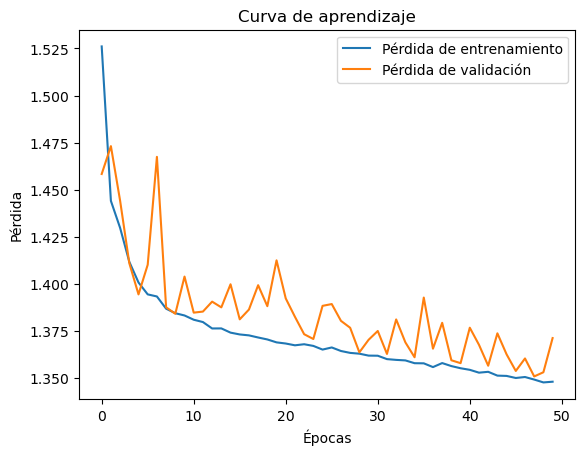

In [28]:
# Graficar las pérdidas de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Curva de aprendizaje')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

Evaluar el rendimiento del Modelo en el Conj. de Entrenamiento y Validacion

In [29]:
# Hacer predicciones en el conjunto de ENTRENAMIENTO
y_train_pred_mlp = model_mlp.predict(x_train_mlp)

# Calcular el error cuadrático medio en el conjunto de entrenamiento
mse_train = mean_squared_error(y_train_mlp, y_train_pred_mlp)
rmse_train = np.sqrt(mse_train)
#----------------------------------------------------------------------------------------------------------------------------------------

# Hacer predicciones en el conjunto de VALIDACION
y_pred_val_mlp = model_mlp.predict(x_val_mlp)

# Calcular el error cuadrático medio en el conjunto de prueba
mse_val = mean_squared_error(y_val_mlp, y_pred_val_mlp)
rmse_val = np.sqrt(mse_val)

#--------------------------------------------------------------------------------------------------------------------------------------------
# Hacer predicciones en el conjunto de PRUEBA
y_pred_mlp = model_mlp.predict(x_test_mlp)

# Calcular el error cuadrático medio en el conjunto de prueba
mse_test = mean_squared_error(y_test_mlp, y_pred_mlp)
rmse_test = np.sqrt(mse_test)

print(f'Raíz del Error Cuadrático Medio en el conjunto de entrenamiento: {rmse_train}')
print(f'Raíz del Error Cuadrático Medio en el conjunto de entrenamiento: {rmse_val}')
print(f'Raíz del Error Cuadrático Medio en el conjunto de prueba: {rmse_test}')

1032/1032 [==============================] - 1s 676us/step
Raíz del Error Cuadrático Medio en el conjunto de entrenamiento: 1.1669182957508752
Raíz del Error Cuadrático Medio en el conjunto de entrenamiento: 1.1709829640559348
Raíz del Error Cuadrático Medio en el conjunto de prueba: 1.1710385188901964


#### Feature Importances in REDES NEURONALES

Metodo 1: Metodo Basado en Gradientes
- Gradiente: En términos matemáticos, el gradiente es una medida de cuánto cambia la salida de una función (en este caso, la red neuronal) en respuesta a cambios en sus entradas. Es un vector que apunta en la dirección del mayor aumento de la función.

- Importancia de las características: La importancia de una característica se puede estimar observando la magnitud del gradiente de la salida con respecto a esa característica. Una mayor magnitud del gradiente sugiere que pequeños cambios en esa característica tienen un gran impacto en la salida, lo que indica una mayor importancia.

- Calcular los gradientes: Una vez que la red neuronal está entrenada, se calculan los gradientes de la salida de la red con respecto a cada característica de entrada. Esto se hace usando el cálculo automático de derivadas, que es una capacidad estándar en bibliotecas de aprendizaje profundo como TensorFlow y PyTorch.

In [ ]:
# model = tf.keras.models.load_model('your_model.h5') # Load your trained model

# X = np.load('your_input_data.npy') # Load your input data

# Convertir X(datos de caracteristicas MLP Red Neuronal Multicapa) a tensor de TensorFlow
input_tensor = tf.convert_to_tensor(X)

# Calcular gradientes de la salida con respecto a las entradas
with tf.GradientTape() as tape:
    tape.watch(input_tensor)
    output = model_mlp(input_tensor)

gradients = tape.gradient(output, input_tensor)

# Calcular la importancia de las características como la media absoluta de los gradientes
feature_importance = np.mean(np.abs(gradients.numpy()), axis=0)

# Obtener los nombres de las características del DataFrame original
feature_names = datos_total_escalados_mlp.columns

# Crear un DataFrame para asociar nombres de características con sus importancias
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Ordenar las características por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
0,tonelaje_inicial_poligono_creado,5.195234
2,elevacion_poligono_metros,3.091627
11,densidad_inicial_poligono_creado_tn/m3,2.670974
7,PH02,1.647419
1,tiempo_ready_llegada_esperando,1.587936
6,PH03,1.404893
8,PH01,1.367331
3,CF02,1.243488
4,CF01,1.094496
5,CF03,1.073487


Metodo 2:  basado en pesos (weight-based methods) 
- se utiliza para estimar la importancia de las características en una red neuronal considerando los pesos o conexiones entre las neuronas
- Extraer Pesos: Obtener los pesos de las capas del modelo, especialmente de la primera capa si se está evaluando la importancia de las características de entrada.
-Calcular Importancia: Calcular la importancia de cada característica sumando los valores absolutos de sus pesos. Esto se basa en la idea de que los pesos con valores absolutos mayores tienen un impacto mayor en la salida del modelo.

In [ ]:
# Obtener los pesos de las capas del modelo
weights = model_mlp.get_weights()

# Calcular la importancia de las características como la suma de los valores absolutos de los pesos de la primera capa
feature_importance = np.sum(np.abs(weights[0]), axis=1)

# Obtener los nombres de las características del DataFrame original
feature_names = datos_total_escalados_mlp.columns

# Crear un DataFrame para asociar nombres de características con sus importancias
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Ordenar las características por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Importancia de las características:")
print(importance_df)

Importancia de las características:
                                          Feature  Importance
0                tonelaje_inicial_poligono_creado   48.484753
11         densidad_inicial_poligono_creado_tn/m3   16.730309
2                       elevacion_poligono_metros   12.434245
1                  tiempo_ready_llegada_esperando   11.950205
8                                            PH01    9.233595
7                                            PH02    7.383513
4                                            CF01    7.086962
3                                            CF02    6.728268
6                                            PH03    6.534295
5                                            CF03    6.196174
10  cantidad_equipos_espera_al_termino_carga_pala    5.191253
12                             horaini_turnocarga    4.638285
9                                            FR01    1.887774


#### Convertir el Modelo a Tflite

1. Convertir desde la misma sesion y Configurar el convertidor TFLite

In [30]:
import tensorflow as tf

# Convertir desde la misma sesion y Configurar el convertidor TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model=model_mlp)

# Especificar las operaciones admitidas por el modelo TFLite
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]

# Deshabilitar la conversión de operaciones de lista de tensores
converter._experimental_lower_tensor_list_ops = False

# Convertir el modelo a TensorFlow Lite
model_tflite = converter.convert()

# Guardar el modelo TensorFlow Lite en disco
with open("model_mlp_v2.tflite", "wb") as f:
    f.write(model_tflite)

INFO:tensorflow:Assets written to: C:\Users\BRYANI~1\AppData\Local\Temp\tmpn4xulxj3\assets


INFO:tensorflow:Assets written to: C:\Users\BRYANI~1\AppData\Local\Temp\tmpn4xulxj3\assets


2. Convertir desde Cargar el modelo desde la ubicacion donde se guardo con "SavedModel de TensorFlow"

 Guardar el modelo entrenado

In [ ]:
# Guardar el modelo entrenado

# Guardando todos los componentes del modelo (arquitectura, pesos, configuración de entrenamiento, estado del optimizador, etc.)
# SavedModel de TensorFlow
model_mlp.save("model_mlp_v1.h5")

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf

# Cargar el modelo desde la ubicacion donde se guardo con "SavedModel de TensorFlow"
model_cargado = tf.keras.models.load_model('model_mlp_v1.h5')

# Convertir el modelo a formato .tflite
converter2 = tf.lite.TFLiteConverter.from_keras_model(model_cargado)

# Especificar el conjunto de operaciones admitidas
converter2.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # Operaciones TensorFlow Lite estándar (mayoría de los modelos, como convoluciones, activaciones, etc.)
    tf.lite.OpsSet.SELECT_TF_OPS      # Operaciones TensorFlow adicionales - Esto debes instalar en el Android Studio Gradle
]

# Convertir el modelo
tflite_model2 = converter2.convert()

# Guardar el modelo convertido en formato .tflite
with open('model_mlp_v1_2.tflite', 'wb') as f:
    f.write(tflite_model2)

INFO:tensorflow:Assets written to: /tmp/tmpi0rhdum3/assets


INFO:tensorflow:Assets written to: /tmp/tmpi0rhdum3/assets
